### **Brazil - CENSO 2022 - IBGE**

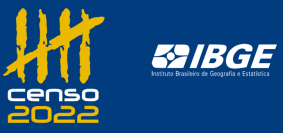


### **Ilhéus - Bahia**
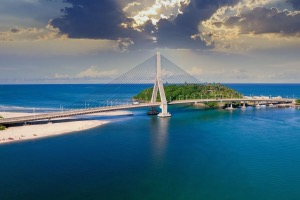


* *The purpose of this study is to analyze the data available in tha Brazilian Censo 2022 published by IBGE (The Brazilian Institute of Geography and Statistics);*

* *Censo is the main population census of Brazil;*

* *IBGE is the main provider of data and information about the Country;*

* *This analysis is focused in the Brazilian city of Ilhéus, state of Bahia.*


**Data source:**

*https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/inicial*


*For this study, the data was filtered from Bigquery to focus only in the city of Ilhéus:*

*https://console.cloud.google.com/bigquery?p=basedosdados&d=br_ibge_censo_2022*



In [1]:
#Required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Path to where files were downloaded after filtered from Bigquery
os.chdir('https://github.com/russopaulo/Censo_Ilheus_AI_immersion')
os.getcwd()


FileNotFoundError: [Errno 2] No such file or directory: 'https://github.com/russopaulo/Censo_Ilheus_AI_immersion'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import all datasets from Bigquery filtered

In [ ]:
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Homens']['populacao_residente'].sum()
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Mulheres']['populacao_residente'].sum()

93077.0

In [ ]:
#Geo Cordinates table
df_coord = pd.read_csv('coordenada_endereco.csv')

#Demographic density table
df_area_terr_dens_dem_mun = pd.read_csv('area_territorial_densidade_demografica_municipio.csv')

#Indexes tables
df_indice_env_mun = pd.read_csv('indice_envelhecimento_municipio.csv')
df_indice_env_cor_raca_mun = pd.read_csv('indice_envelhecimento_cor_raca_municipio.csv')

#Population tables
df_pop_res_mun = pd.read_csv('populacao_residente_municipio.csv')
df_pop_res_cor_raca = pd.read_csv('populacao_residente_cor_raca_municipio.csv')






#Quilombo tables
df_quil_pop_res_mun = pd.read_csv('quilombolas_populacao_residente_municipio.csv')
df_quil_dom_1_mor_q_mun = pd.read_csv('quilombolas_domicilio_pelo_menos_um_morador_quilombola_municipio.csv')
df_quil_dom_mor_mun = pd.read_csv('quilombolas_domicilio_morador_municipio.csv')



#Residents tables
df_mor_cor_raca_tip_dom_mun = pd.read_csv('morador_cor_raca_tipo_domicilio_municipio.csv')
df_mor_cor_raca_lig_abast_agua_mun = pd.read_csv('morador_cor_raca_ligacao_abastecimento_agua_municipio.csv')
df_mor_cor_raca_esgot_san_mun = pd.read_csv('morador_cor_raca_esgotamento_sanitario_municipio.csv')
df_mor_cor_raca_dest_lix_mun = pd.read_csv('morador_cor_raca_destino_lixo_municipio.csv')

#Indigenous tables
df_indig_pop_res_mun = pd.read_csv('indigenas_populacao_residente_municipio.csv')
df_indig_pop_grup_idad_mun = pd.read_csv('indigenas_populacao_grupo_idade_municipio.csv')
df_indig_indic_env_mun = pd.read_csv('indigenas_indice_envelhecimento_municipio.csv')
df_indig_dom_1_mor_ind_mun = pd.read_csv('indigenas_domicilio_pelo_menos_um_morador_indigena_municipio.csv')
df_indig_dom_mor_mun = pd.read_csv('indigenas_domicilio_morador_municipio.csv')



#Domiciles tables
df_dom_tipo_mun = pd.read_csv('domicilio_tipo_municipio.csv')
df_dom_qtde_esgot_san_mun = pd.read_csv('domicilio_quantidade_esgotamento_sanitario_municipio.csv')
df_dom_mor_setor_censit = pd.read_csv('domicilio_morador_setor_censitario.csv')
df_dom_mor_mun = pd.read_csv('domicilio_morador_municipio.csv')
df_dom_lig_abast_agua_mun = pd.read_csv('domicilio_ligacao_abastecimento_agua_municipio.csv')
df_dom_esgot_san_mun = pd.read_csv('domicilio_esgotamento_sanitario_municipio.csv')
df_dom_dest_lix_mun = pd.read_csv('domicilio_destino_lixo_municipio.csv')
df_dom_canal_abast_agua_mun = pd.read_csv('domicilio_canalizacao_abastecimento_agua_municipio.csv')




Convert and check address type quantity

In [ ]:
#Reference for especie_endereco column

#1 Domicílio particular
#2 Domicílio coletivo
#3 Estabelecimento agropecuário
#4 Estabelecimento de ensino
#5 Estabelecimento de saúde
#6 Estabelecimento de outras finalidades
#7 Edificação em construção
#8 Estabelecimento religioso

#Convert numbers to words
df_coord['especie_endereco'].replace([1, 2, 3, 4, 5, 6, 7, 8], ['Particular Dom.', 'Colective Dom.', 'Agricult. Estab.', 'Teaching Estab.', 'Health Estab.', 'Other Estab.', 'Build. u/Construct.', 'Religious Estab.'], inplace=True)

#Save on a variable to plot
address_type = df_coord['especie_endereco'].value_counts(ascending=True)


Plot address type to check

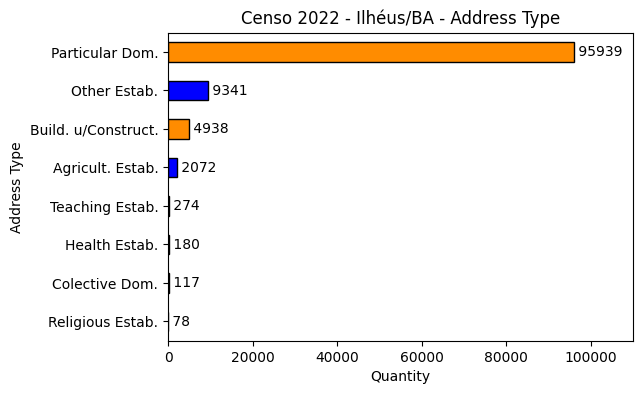

In [ ]:
address_type.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type',
                  ylabel='Address Type',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 110000),
                  )


for index, value in enumerate(address_type.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')

Above we can see most part of establishments in Ilhéus are Particular (+95k), followed by Other (+9k) and under construction (+4k).

Below we have same numbers but showing in % scale.

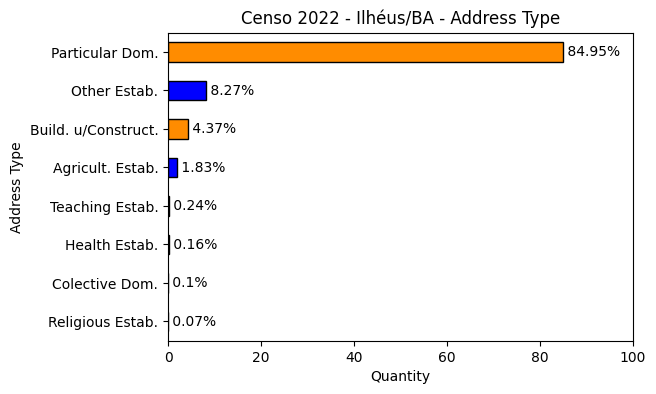

In [ ]:
address_type_perc = round(df_coord['especie_endereco'].value_counts(ascending=True, normalize=True) * 100, 2)

address_type_perc.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type',
                  ylabel='Address Type',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 100),
                  )


for index, value in enumerate(address_type_perc.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

In [ ]:
df_coord.shape

(112939, 7)

Plotting points where Censo agents visited by Address Type (112939 points).

Censo 2022 visited + 112k places in Ilhéus.

Plotting a map to see all these points visible, colored by address type.

In [ ]:
fig = px.scatter_mapbox(df_coord, lat='latitude', lon='longitude', color='especie_endereco',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style='carto-positron',
                  title='Addresses Visited - Censo 2022 - Ilhéus/BA',
                  labels={'especie_endereco': 'Address Type'})
fig.show()

Some points on the map may not be 100% accurate, this is because the level (or type) of the geo coordinate.

In [ ]:
#1 Endereço - coordenada original do Censo 2022
#2 Endereço - coordenada modificada (apartamentos em um mesmo número no logradouro)
#3 Endereço - coordenada estimada (endereços originalmente sem coordenadas ou coordenadas inválidas)
#4 Face de quadra
#5 Localidade
#6 Setor censitário

df_coord['nivel_geo_coordenada'].value_counts()
df_coord['nivel_geo_coordenada'].replace([1, 2, 3, 4, 5, 6], ['Address - original 2022 Census coordinate', 'Address - modified coordinate (apartments with the same number in the street)', 'Address - estimated coordinate (addresses originally without coordinates or invalid coordinates)', 'Square face', 'Location', 'Census Sector'], inplace=True)

coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)


Plotting the geo coordinate level.

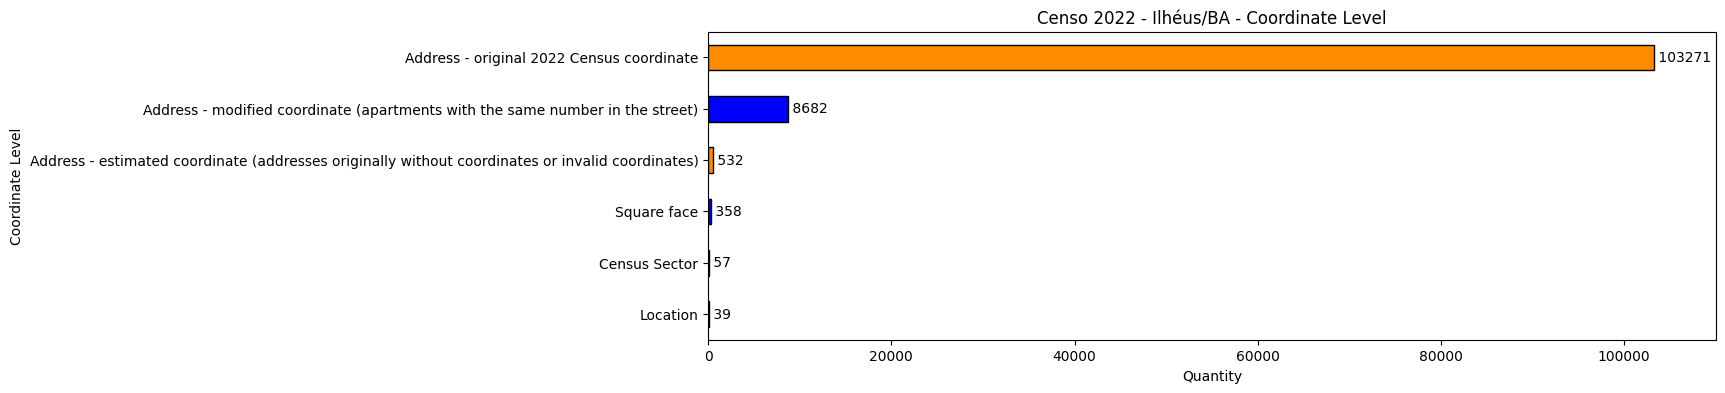

In [ ]:
coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level',
                  ylabel='Coordinate Level',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 110000),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')

Plotting again but with a % scale

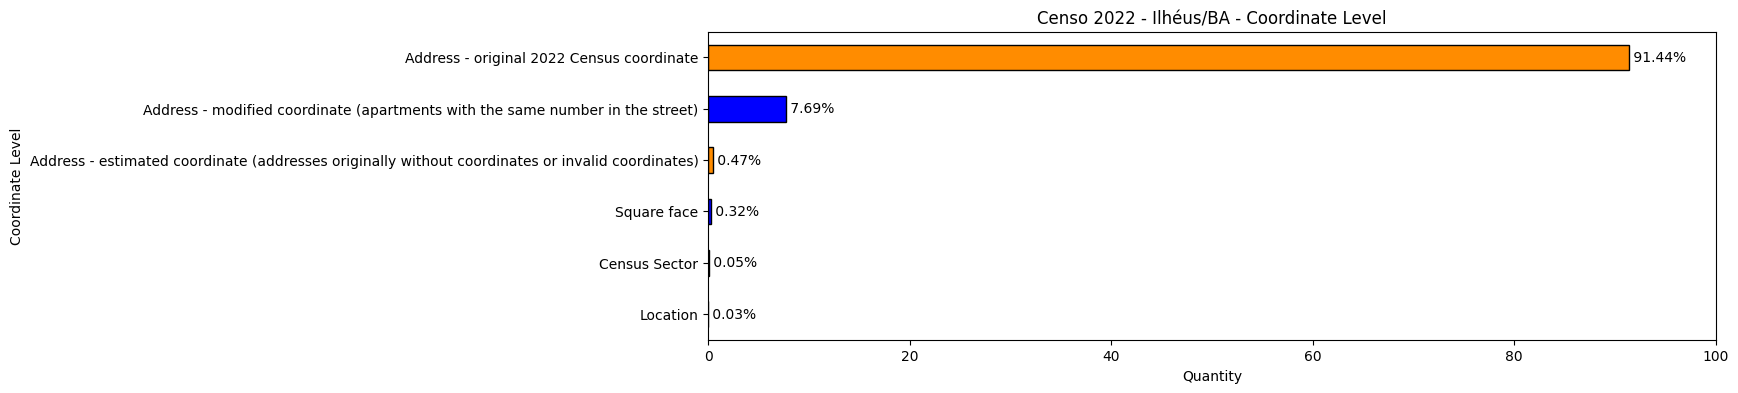

In [ ]:
coord_level = round(df_coord['nivel_geo_coordenada'].value_counts(ascending=True, normalize=True) * 100, 2)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level',
                  ylabel='Coordinate Level',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 100),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

About 103k addresses (91%) coordinates were originally collected on 2022, while about 8k are modified coordinates (apartments with the same number in the street). The remaining are unexpressible, less than 1000 addresses (less than 1%). We can conclude the addresses in general express the reality very well.

Now let's check how concentrated is the Ilhéus population amd the total population.

In [ ]:
popul_dens = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

popul_dens = popul_dens['populacao_residente'] / popul_dens['area_unidade_territorial']

popul_res = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

print(popul_dens)
print(popul_res['populacao_residente'])



1030    112.428571
dtype: float64
1030    178649
Name: populacao_residente, dtype: int64


Ilhéus has a demographic density of about 112 persons per square meter, pretty low, as a reference São Paulo (biggest city in Brazil) has 7382, Salvador 3486.

Ilhéus has about 178k residents in 2022, as a reference São Paulo has 11.9MI and Salvador 2.4MI.

In 2010 Ilhéus had 184k residents. We see a population decrease of 6k.

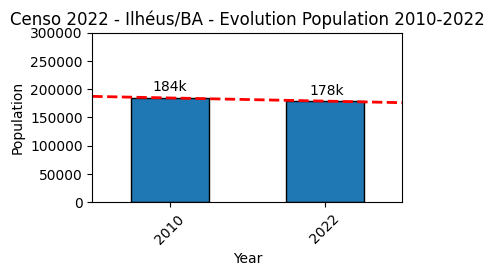

In [ ]:
d = {'Year': [2010, 2022], 'Population': [184236, 178649]}
pop_2010_2022 = pd.DataFrame(data=d)

pop_2010_2022.plot(kind='bar',
                                             x='Year',
                                             y='Population',
                                             edgecolor='black',
                                             ylabel='Population',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 300000),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution Population 2010-2022',
                                             rot=45
                                            )

plt.axline((0, 184236), (1, 178649), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 197236, '184k')
plt.text(0.9, 190649, '178k')
plt.show()

Let's check general distribution of median age, age index and sex ratio.

In [ ]:
df_indice_env_mun = df_indice_env_mun[['idade_mediana', 'indice_envelhecimento', 'razao_sexo']]
df_indice_env_mun

idade_mediana  indice_envelhecimento  razao_sexo
0           36.0                  56.87       91.87

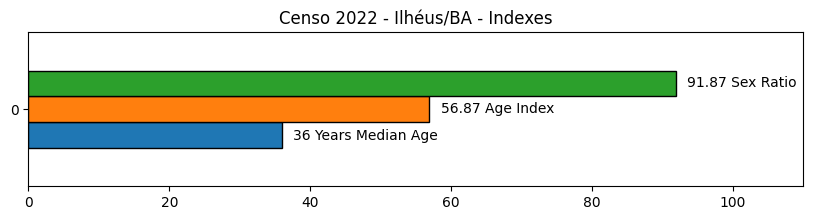

In [ ]:
df_indice_env_mun.plot(kind='barh',
                        title='Censo 2022 - Ilhéus/BA - Indexes',
                        legend=False,
                        edgecolor='black',
                        figsize=(10,2),
                        xlim=(0, 110),
                       )

plt.text(37.5, -0.17, '36 Years Median Age ', va='center')
plt.text(58.5, 0, '56.87 Age Index', va='center')
plt.text(93.5, 0.17, '91.87 Sex Ratio', va='center')

plt.show()

Ilhéus has an aging index of 56.87 in 2022, which means for every 56 elderly (+60 years) there are 100 children (-15 years).

Age index considers:
- a value lower than 15 as indicative of a young population;
- between 15 and 30, a population at an intermediate level;
- and over 30, an elderly population.

In this case we can consider that Ilhéus has an elderly population, besides the median age is 36.

Another interest indicator is sex ratio 91.87, which means that for every 91 men there are 100 women, an indication that the majority of population in Ilhéus is female.

But Ilhéus 10 years ago was not like that, let's check the evolution of aging index, median age and sex ratio on last 12 years by race.

In [ ]:
#df_indice_env_cor_raca_mun.drop('id_municipio', axis=1, inplace=True)

parda = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Parda']
preta = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Preta']
branca = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Branca']
amarela = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Amarela']
indigena = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Indígena']

parda, preta, branca, amarela, indigena

(    ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 0  2010       2913606    Parda                  36.23             27   
 1  2022       2913606    Parda                  79.63             36   
 
    razao_sexo  
 0       93.53  
 1       90.73  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 2  2010       2913606    Preta                  47.72             29   
 3  2022       2913606    Preta                  95.33             36   
 
    razao_sexo  
 2      102.98  
 3       97.23  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 4  2010       2913606   Branca                  52.44             30   
 5  2022       2913606   Branca                 102.50             37   
 
    razao_sexo  
 4       89.52  
 5       87.98  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 6  2010       2913606  Amarela                  24.88             26   
 7  2022       2913606  Amarela    

Plotting all cases

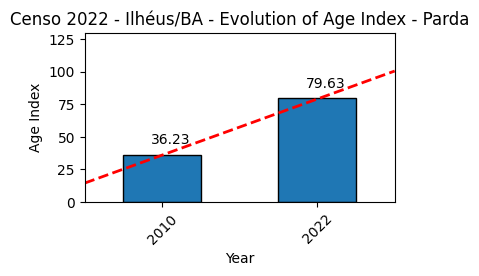

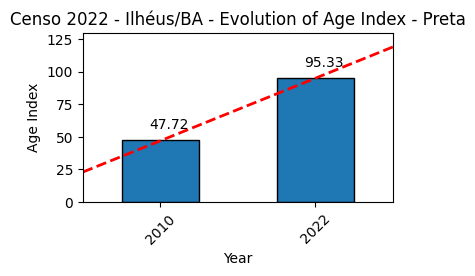

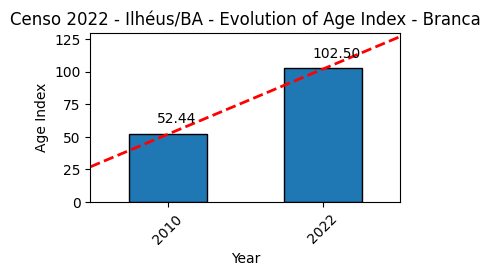

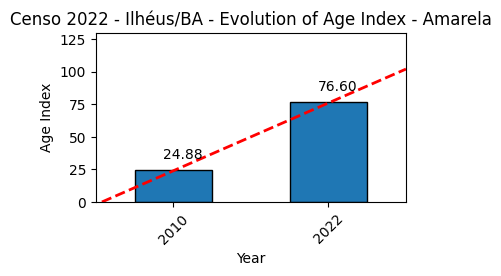

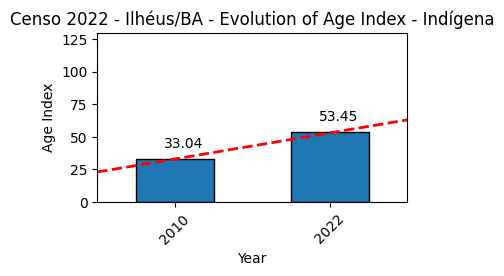

In [ ]:
parda[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Parda',
                                             rot=45
                                            )

plt.axline((0, 36), (1, 79), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 45, '36.23')
plt.text(0.93, 88, '79.63')



preta[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Preta',
                                             rot=45
                                            )

plt.axline((0, 47), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 56, '47.72')
plt.text(0.93, 104, '95.33')



branca[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Branca',
                                             rot=45
                                            )

plt.axline((0, 52), (1, 102), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 61, '52.44')
plt.text(0.93, 111, '102.50')
plt.show()


amarela[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Amarela',
                                             rot=45
                                            )

plt.axline((0, 24), (1, 76), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 33, '24.88')
plt.text(0.93, 85, '76.60')
plt.show()


indigena[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Indígena',
                                             rot=45
                                            )

plt.axline((0, 33), (1, 53), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 42, '33.04')
plt.text(0.93, 62, '53.45')
plt.show()

Age Index by race brings interesting information. All races had an increase in the the last 12 years.

However the increase was not the same:

- Indígena (indigenous) +20.42
- Parda (black mixed with white) +43.49
- Preta (black) +47.61
- Branca (while) +50.06
- Amarela (yellow - asian) +51.72

We can see that indigenous people had the lower increase, half of 2nd race Parda.

Observing from this point we can say that indigenous people were the ones who got less elderly while Asian people got more.

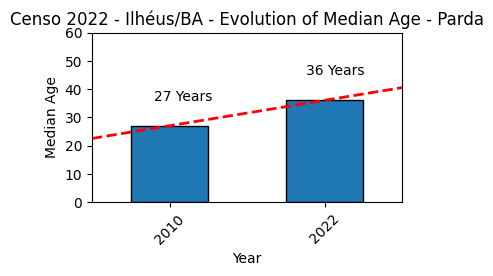

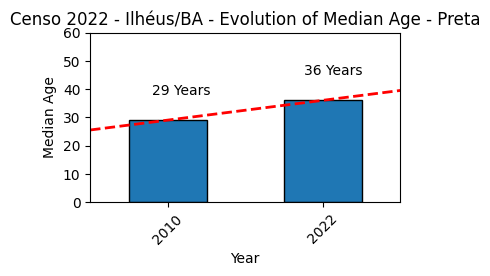

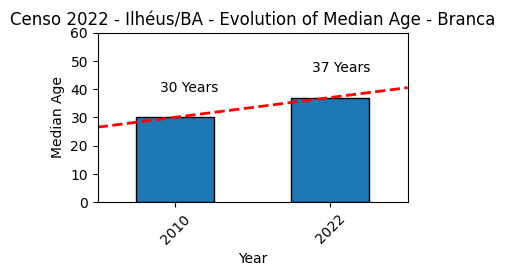

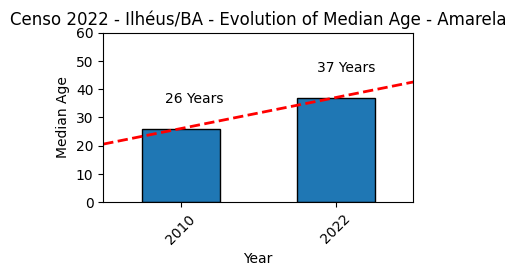

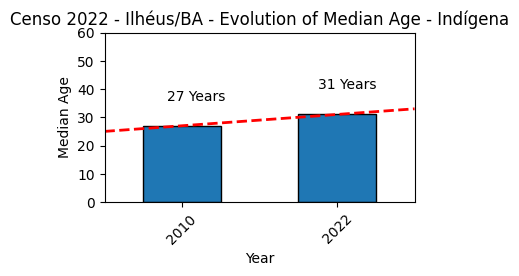

In [ ]:
parda[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Parda',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 36, '27 Years')
plt.text(0.88, 45, '36 Years')

plt.show()


preta[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Preta',
                                             rot=45
                                            )

plt.axline((0, 29), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 38, '29 Years')
plt.text(0.88, 45, '36 Years')

plt.show()


branca[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Branca',
                                             rot=45
                                            )

plt.axline((0, 30), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 39, '30 Years')
plt.text(0.88, 46, '37 Years')

plt.show()


amarela[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Amarela',
                                             rot=45
                                            )

plt.axline((0, 26), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 35, '26 Years')
plt.text(0.88, 46, '37 Years')

plt.show()


indigena[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Indígena',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 31), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 36, '27 Years')
plt.text(0.88, 40, '31 Years')

plt.show()


Regarding Median Age by race, we also see an increase in the the last 12 years.

However the increase was also not the same:

- Indígena (indigenous) +4 Years
- Preta (black) +7 Years
- Branca (while) +7 Years
- Parda (black mixed with white) +9 Years
- Amarela (yellow - asian) +11 Years

We can see that indigenous people again had the lower increase, almost half of 2nd races Black and White.

Observing from this point we can say that indigenous people again were the ones who got less elderly while Asian again people got more.

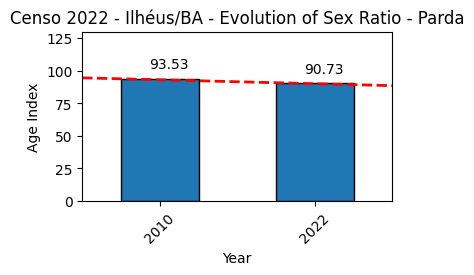

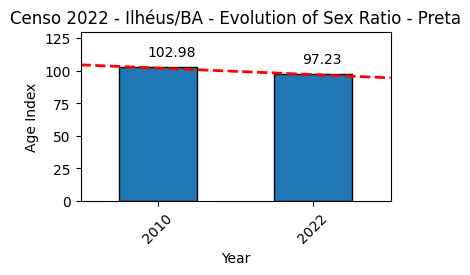

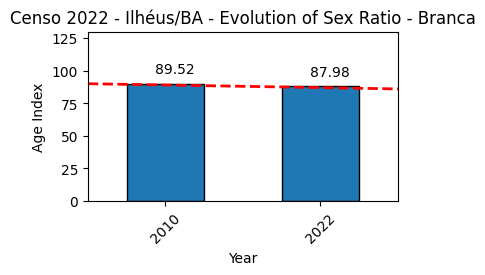

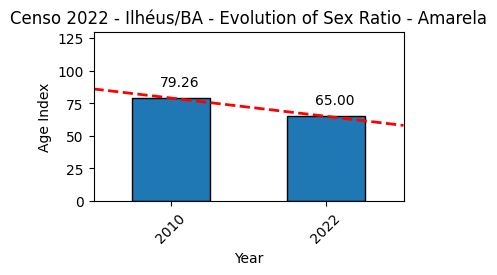

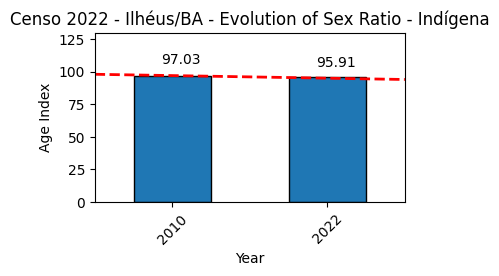

In [ ]:
parda[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Parda',
                                             rot=45
                                            )

plt.axline((0, 93), (1, 90), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 102, '93.53')
plt.text(0.93, 98, '90.73')
plt.show()


preta[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Preta',
                                             rot=45
                                            )

plt.axline((0, 102), (1, 97), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 111, '102.98')
plt.text(0.93, 106, '97.23')

plt.show()


branca[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Branca',
                                             rot=45
                                            )

plt.axline((0, 89), (1, 87), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 98, '89.52')
plt.text(0.93, 96, '87.98')

plt.show()


amarela[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Amarela',
                                             rot=45
                                            )

plt.axline((0, 79), (1, 65), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 88, '79.26')
plt.text(0.93, 74, '65.00')

plt.show()


indigena[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Indígena',
                                             rot=45
                                            )

plt.axline((0, 97), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 106, '97.03')
plt.text(0.93, 104, '95.91')

plt.show()


Regarding Sex Ratio by race, we see a decrease in all races in the last 12 years. Which means in general the male population decreases while the female increased.

However as expected, the decrease was also not the same:

- Indígena (indigenous) -1.12
- Branca (while) -1.54
- Parda (black mixed with white) -2.8
- Preta (black) -5.75
- Amarela (yellow - asian) -14.26

We can see that indigenous people again had the lower increase on female population, compared to the biggest is about 14 times less.

It's also interesting to observe that only Black people had more men in 2010 and now female in 2022.

Indigenous and Black people have the most distributed polulation between men and women (indexes 95.91 and 97.23 - 100 means equal distribution), while Asian people has the less distributed with big majority women (index 65).

Now let's check the proportion of Men x Women

In [ ]:
men_women = df_pop_res_mun[['sexo', 'populacao_residente']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby('sexo').sum()
men_women



populacao_residente
sexo                      
Men                85524.0
Women              93077.0

In [ ]:

men_women_new = pd.DataFrame(data=[[85524.0, 93077.0]], columns=['Men', 'Women'], index=['Sex'])
men_women_new

Men    Women
Sex  85524.0  93077.0

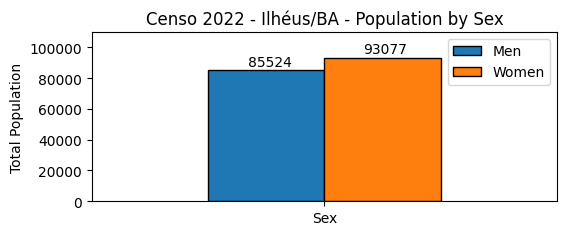

In [ ]:
men_women_new.plot(kind='bar',
               ylabel='Total Population',
               figsize=(6,2.2),
               ylim=(0, 110000),
               title='Censo 2022 - Ilhéus/BA - Population by Sex',
               rot=0,
               edgecolor='black')

plt.text(-0.165, 87524, '85524')
plt.text(0.084, 96077, '93077')

plt.show()

85k Men x 93k Women in Ilhéus, let's check in %

In [ ]:
men_women_perc = ((men_women/men_women.sum())*100)
men_women_perc

men_women_perc_new = pd.DataFrame(data=[[47.88551, 52.11449]], columns=['Men', 'Women'], index=['Sex'])
men_women_perc_new


Men     Women
Sex  47.88551  52.11449

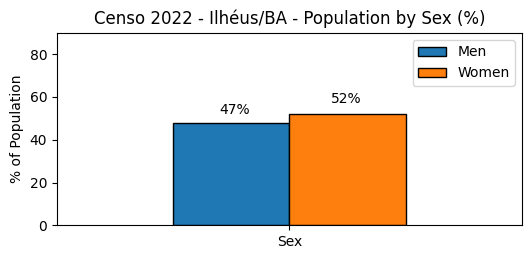

In [ ]:
men_women_perc_new.plot(kind='bar',
               ylabel='% of Population',
               figsize=(6,2.5),
               ylim=(0, 90),
               title='Censo 2022 - Ilhéus/BA - Population by Sex (%)',
               rot=0,
               edgecolor='black'
                                            )

plt.text(-0.15, 52, '47%')
plt.text(0.09, 57, '52%')

plt.show()

Population of Women is 5% higher than men and compared to 2010 the female population seems to be increasing.

Regarding age, during Censo 2022 we had date of birth (DOB) checked and presumed, let's check it.

In [ ]:
dec_age = df_pop_res_mun[['forma_declaracao_idade', 'populacao_residente', 'sexo']].replace(['Data de nascimento', 'Idade presumida', 'Homens', 'Mulheres'], ['Real DOB', 'Presumed DOB', 'Men', 'Women']).groupby(['forma_declaracao_idade', 'sexo']).sum()
dec_age


dec_age_new = pd.DataFrame(data=[[16670.0, 15575.0], [68854.0, 77502.0]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_new


Men    Women
Presumed DOB  16670.0  15575.0
Real DOB      68854.0  77502.0

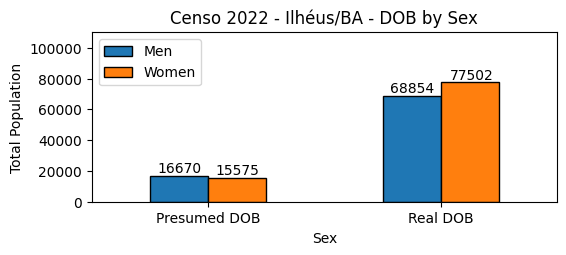

In [ ]:
dec_age_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Sex',
               figsize=(6,2.2),
               ylim=(0, 110000),
               rot=0,
               title='Censo 2022 - Ilhéus/BA - DOB by Sex',
               edgecolor='black'
                                            )

plt.text(-0.22, 18770, '16670')
plt.text(0.03, 17575, '15575')
plt.text(0.78, 70854, '68854')
plt.text(1.04, 79502, '77502')

plt.show()

In [ ]:
dec_age_perc = (dec_age / dec_age.sum())*100
dec_age_perc

dec_age_perc_new = pd.DataFrame(data=[[9.333654, 8.720556], [38.551856, 43.393934]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_perc_new

Men      Women
Presumed DOB   9.333654   8.720556
Real DOB      38.551856  43.393934

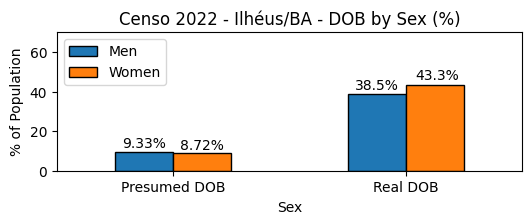

In [ ]:
dec_age_perc_new.plot(kind='bar',
               ylabel='% of Population',
               xlabel='Sex',
               figsize=(6,1.8),
               ylim=(0, 70),
               title='Censo 2022 - Ilhéus/BA - DOB by Sex (%)',
               edgecolor='black',
               rot=0

                                            )

plt.text(-0.22, 12, '9.33%')
plt.text(0.03, 11, '8.72%')
plt.text(0.78, 41, '38.5%')
plt.text(1.04, 46, '43.3%')

plt.show()

We can conclude here that regarding age, about 18% of the ages were not really collected but presumed by the agent, only 82% is real DOB

It seems well distributed by sex.

Let's check how distributed is the Age Groups.

In [ ]:
#This is to correct idade_anos column and create a proper age_group, there are many division here and this is not necessary
df_pop_res_mun_copy = df_pop_res_mun

age_ranges = []
for i in df_pop_res_mun['idade_anos']:
    if math.isnan(i):
        age_ranges.append('-12 Years')

    elif i < 12:
        age_ranges.append('-12 Years')

    elif i >= 12 and i <18:
        age_ranges.append('12 to 17 Years')

    elif i >= 18 and i <65:
        age_ranges.append('18 to 65 Years')

    else:
        age_ranges.append('+65 Years')

df_pop_res_mun_copy['idade_anos_corr'] = age_ranges

df_pop_res_mun_copy

id_municipio forma_declaracao_idade      sexo    idade  idade_anos  \
0         2913606     Data de nascimento    Homens    1 mês         NaN   
1         2913606        Idade presumida    Homens   2 anos        2.00   
2         2913606        Idade presumida  Mulheres   2 anos        2.00   
3         2913606     Data de nascimento  Mulheres   3 anos        3.00   
4         2913606     Data de nascimento  Mulheres   5 anos        5.00   
..            ...                    ...       ...      ...         ...   
439       2913606        Idade presumida    Homens  3 meses        0.25   
440       2913606        Idade presumida    Homens  94 anos       94.00   
441       2913606        Idade presumida  Mulheres  95 anos       95.00   
442       2913606        Idade presumida    Homens  91 anos       91.00   
443       2913606     Data de nascimento    Homens  92 anos       92.00   

          grupo_idade  populacao_residente idade_anos_corr  
0    100 anos ou mais                 68.0       -12 Years  
1          0 a 4 anos                131.0       -12 Years  
2          0 a 4 anos                117.0       -12 Years  
3          0 a 4 anos                952.0       -12 Years  
4          5 a 9 anos                892.0       -12 Years  
..                ...                  ...             ...  
439        0 a 4 anos                  9.0       -12 Years  
440      90 a 94 anos                 10.0       +65 Years  
441      95 a 99 anos                 10.0       +65 Years  
442      90 a 94 anos                 12.0       +65 Years  
443      90 a 94 anos                 31.0       +65 Years  

[444 rows x 8 columns]

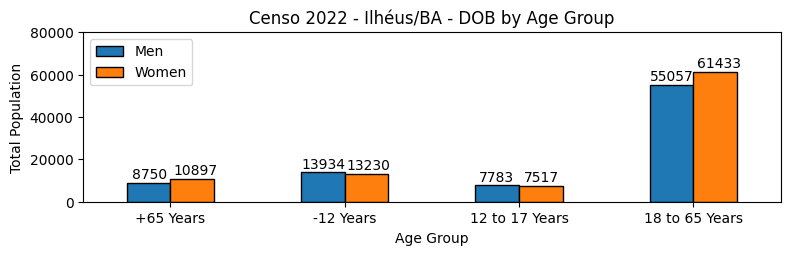

In [ ]:
#select proper columns
pop_age_sex = df_pop_res_mun[['idade_anos_corr', 'populacao_residente', 'sexo']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby(['idade_anos_corr', 'sexo']).sum()

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_new = pd.DataFrame(data=[[8750.0, 10897.0], [13934.0, 13230.0], [7783.0, 7517.0], [55057.0, 61433.0]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_new

#plot
pop_age_sex_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 80000),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.22, 10770, '8750')
plt.text(0.75, 15575, '13934')
plt.text(1.77, 9783, '7783')
plt.text(2.75, 57057, '55057')

plt.text(0.02, 12897, '10897')
plt.text(1.01, 15230, '13230')
plt.text(2.03, 9517, '7517')
plt.text(3.02, 63433, '61433')

plt.show()

Most part of Ilhéus population is in the 18 to 65 years range, followed by less than 12, more than 65 and 12 to 17.

By sex it seems well distributed, with female slighly higher.

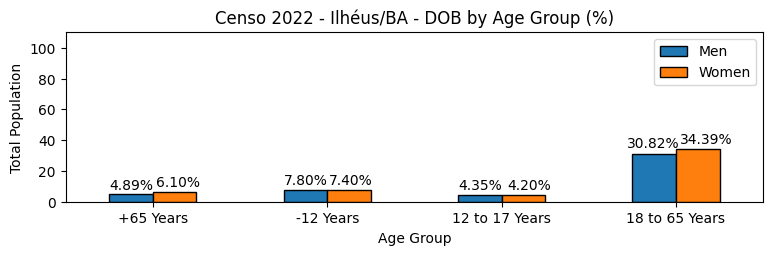

In [ ]:
#convert to %
pop_age_sex_perc = (pop_age_sex / pop_age_sex.sum())*100

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_perc_new = pd.DataFrame(data=[[4.89, 6.10], [7.80, 7.40], [4.35, 4.20], [30.82, 34.39]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_perc_new

#plot
pop_age_sex_perc_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 110),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group (%)',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.25, 8, '4.89%')
plt.text(0.75, 11, '7.80%')
plt.text(1.75, 8, '4.35%')
plt.text(2.72, 35, '30.82%')

plt.text(0.02, 10, '6.10%')
plt.text(1.01, 11, '7.40%')
plt.text(2.03, 8, '4.20%')
plt.text(3.02, 38, '34.39%')

plt.show()

Same as before but in percentage.

- +65% of Ilhéus population is in the 18 to 65 years range;
- +15% less than 12;
- +11% more than 65;
- +8% from 12 to 17.

In [ ]:
df_pop_res_cor_raca

ano  id_municipio       grupo_idade      sexo  cor_raca  \
0    2022       2913606        0 a 4 anos    Homens     Parda   
1    2022       2913606        0 a 4 anos  Mulheres    Branca   
2    2010       2913606        0 a 4 anos  Mulheres   Amarela   
3    2022       2913606        0 a 4 anos  Mulheres  Indígena   
4    2010       2913606        0 a 4 anos    Homens  Indígena   
..    ...           ...               ...       ...       ...   
415  2022       2913606  100 anos ou mais    Homens    Branca   
416  2022       2913606  100 anos ou mais  Mulheres     Preta   
417  2010       2913606  100 anos ou mais    Homens     Parda   
418  2010       2913606  100 anos ou mais  Mulheres     Preta   
419  2022       2913606  100 anos ou mais  Mulheres     Parda   

     populacao_residente  
0                 3080.0  
1                 1062.0  
2                   63.0  
3                  331.0  
4                  149.0  
..                   ...  
415                  6.0  
416                  7.0  
417                  8.0  
418                 10.0  
419                 18.0  

[420 rows x 6 columns]